#**1. Introduction**
In today's world, where the global community continues to combat the COVID-19 pandemic, the development of accurate and efficient tools for disease prediction has become increasingly crucial. In line with this need, our proposal aims to build a machine learning model to predict whether an individual is COVID-19 positive or not based on a dataset of symptoms. By leveraging the power of machine learning algorithms, we aim to enhance the accuracy and speed of COVID-19 diagnosis, thereby contributing to effective medical treatment and reducing the burden on healthcare systems.

###**Importance in Today's World:**

The COVID-19 pandemic has overwhelmed healthcare systems worldwide, leading to a pressing need for efficient and reliable diagnostic methods. Traditional diagnostic approaches, such as PCR testing, often require time-consuming laboratory procedures and are limited by testing capacity. By developing a machine learning model for COVID-19 prediction, we offer a promising solution that can provide quick and accurate assessments based on symptoms alone, without the need for extensive laboratory testing. This can greatly improve the early identification of COVID-19 cases, enabling prompt medical intervention and appropriate allocation of healthcare resources.

###**Improving Medical Treatment:**

Accurate disease prediction plays a crucial role in improving medical treatment outcomes. By accurately identifying individuals who are likely to be COVID-19 positive, our machine learning model can enable early intervention, leading to timely medical care and the implementation of necessary preventive measures. This early detection can help prevent disease progression, reduce the severity of symptoms, and improve overall patient outcomes.

###**Impact on the Medical Field:**

The implementation of an effective screening tool based on our machine learning model can have a profound impact on the medical field. It can significantly reduce the burden on healthcare systems by streamlining the diagnostic process, particularly in areas with limited testing capacities. By efficiently identifying COVID-19 positive individuals, healthcare resources can be optimized, ensuring that critical cases receive immediate attention while preventing the unnecessary utilization of resources for low-risk cases. This targeted allocation of resources can help in managing the influx of patients, improving overall healthcare delivery, and potentially saving lives.

###**Future Applications and Knowledge Gap:**

Beyond its immediate application in COVID-19 prediction, our proposed machine learning model can serve as a valuable framework for predicting other diseases based on symptoms. The knowledge gained from developing this model, such as feature selection techniques and algorithmic approaches, can be applied to future disease prediction efforts. This has the potential to fill knowledge gaps in various healthcare domains, allowing for faster and more accurate diagnosis of diseases beyond COVID-19. The ability to predict diseases accurately has far-reaching implications for personalized medicine, public health planning, and the development of targeted treatment strategies, ultimately leading to improved healthcare outcomes for individuals and communities alike.

#**2. Initial Hypothesis**

Based on the dataset provided, we can form the following initial hypotheses:

Hypothesis 1: Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus.

This hypothesis suggests that individuals who have had close contact with confirmed COVID-19 positive patients are at a higher risk of being infected themselves. By examining the variable "Known_contact" in the dataset, we can investigate whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

Hypothesis 2: Symptoms such as shortness of breath, fever, and cough are important factors in predicting COVID-19 positive cases.

This hypothesis proposes that symptoms such as shortness of breath, fever, and cough are key indicators in identifying COVID-19 positive cases. By analyzing the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we can explore the relationship between these symptoms and the likelihood of a person being COVID-19 positive or negative.

It is important to note that these are initial hypotheses based on the provided dataset, and further analysis and modeling will be required to validate these assumptions and uncover additional insights related to COVID-19 prediction.

#**3. Data Analysis**

###3.1 Importing the Modules

In [1]:
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore") # ignoring wranings

###3.2 Reading the Dataset

In [2]:
# reading the dataset

covid_tested_raw = pd.read_csv("corona_tested_006.csv")

# creating a copy of datase

covid_tested = covid_tested_raw.copy()

# getting shape of dataset provided
covid_tested.shape

(278848, 11)

Insights:

We have 2,78,848 **observation** and 11 **variables**.

###3.3 Checking First 5 and Last 5 rows.

In [3]:
covid_tested.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
covid_tested.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


Insights:

There are records with value as None in Age and Sex column.

Also, we can see some data are in UPPERCASE and some are in LOWERCASE.

In [5]:
# Checking number of features and their data types

covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Insights:

*   All the columns are of Object Data type except Ind_ID which is of integer type.
*   There is no NULL values in any columns.



In [6]:
#getting statistical summary of data
covid_tested.describe(include = "all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###3.4 Data Cleaning

In [7]:
#checking for duplicates in data
covid_tested.duplicated().sum()

0

There are no duplicates in columns.

In [8]:
covid_tested.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

####3.4.1 Dropping unwanted Columns

'Ind_ID' and 'Test_date' which we don't need in our analysis and in model building.
As per our business requirement , we have to divide the dataset in training set and Testing set based on Test_date , so we will keep this column now and drop it before model building and dividng dataset into Training set and Test set.
Corona is our Outcome variable.
For now , we will drop 'Ind_ID' column.

In [9]:
#dropping 'Ind_ID' Column.
covid_tested = covid_tested.drop(['Ind_ID'] , axis = 1)

In [10]:
covid_tested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [11]:
covid_tested.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
Known_contact           3
dtype: int64

In [12]:
# viewing the unique values in each variables.

pd.Series({c: covid_tested[c].unique() for c in covid_tested})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

As mentioned above, there is a repitation of data in Uppercase and Lowercase in all the symptoms columns. Let's check this out in number of values.

In [13]:
for c in covid_tested.columns:
    print("---- %s ---" % c)
    print(covid_tested[c].value_counts())

---- Test_date ---
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
1

**Insights:**

*  In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to address these as we have to rename and make it to True and False only.



*   We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.
*   As these values are null values , but not recognised as Null value.
Let's clean each column separately




In [14]:
# Cough Symptoms Column

covid_tested['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [15]:
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

**Insights:**

We have value as "None" in 252 records , we need to impute these values or drop it. As this contain categorical values , we can't use mean imputation or KNN imputation. Imputing it with Mode(which is False) might make our data bias.

Therefore droping these records is the best option.


But Before doing that I want to check relation between "Cough_symptoms" column and "Corona" column. We also have value as "Other" in Corona column. So , let's check if there is a relation between "other"value of corona column and in "None" value of Cough_symptoms and "Fever" Column.

In [16]:
covid_tested[covid_tested["Cough_symptoms"] == "None"]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
68,11-03-2020,None,FALSE,TRUE,FALSE,FALSE,positive,None,None,Abroad
281,11-03-2020,None,None,FALSE,FALSE,FALSE,positive,None,None,Abroad
577,12-03-2020,None,None,None,None,None,positive,None,None,Other
2664,15-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
4442,16-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
95936,04-04-2020,None,None,False,False,False,negative,No,male,Other
95937,04-04-2020,None,None,False,False,False,negative,No,female,Other
95938,04-04-2020,None,None,False,False,False,negative,Yes,male,Other
95939,04-04-2020,None,None,False,False,False,negative,No,female,Other


 I don't see any relation between them. So, I will be dropping the rows with None value in cough symptoms.

In [17]:
# Dropping rows with None value in column "Cough_Symptoms"

covid_tested = covid_tested[covid_tested.Cough_symptoms != "None"]

In [18]:
covid_tested['Cough_symptoms'].unique()

array([True, False], dtype=object)

The column COUGH_SYMPTOMS is cleaned.

#### 3.4.2 Fever Column

In [19]:
covid_tested['Fever'].value_counts()

False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

In [20]:
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Fever'].value_counts()

False    256843
True      21751
None          2
Name: Fever, dtype: int64

Since, There is only 2 None value rows in Fever Column, we can drop this rows too, as this will not make much of a difference in the result.

In [21]:
# Dropping rows with None value in column "Fever"

covid_tested = covid_tested[covid_tested.Fever != "None"]

In [22]:
covid_tested['Cough_symptoms'].unique()

array([True, False], dtype=object)

####3.4.3 Sore Throat Column

In [23]:
covid_tested['Sore_throat'].value_counts()

False    212357
FALSE     64315
TRUE       1194
True        728
Name: Sore_throat, dtype: int64

In [24]:
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Sore_throat'].value_counts()

False    276672
True       1922
Name: Sore_throat, dtype: int64

####3.4.4 Shortness of Breath Column

In [25]:
covid_tested['Shortness_of_breath'].value_counts()

False    212615
FALSE     64405
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

In [26]:
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Shortness_of_breath'].value_counts()

False    277020
True       1574
Name: Shortness_of_breath, dtype: int64

#### 3.4.5 Headache Column

In [27]:
covid_tested['Headache'].value_counts()

False    212100
FALSE     64086
TRUE       1423
True        985
Name: Headache, dtype: int64

In [28]:
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Headache'].value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

In [29]:
covid_tested.describe(include = 'all')

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278594,278594,278594,278594,278594,278594,278594,278594,278594,278594
unique,51,2,2,2,2,2,3,3,3,3
top,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,10921,236368,256843,276672,277020,276186,260008,127315,130030,242504


#### 3.4.6 Age_60_Above Column

In [30]:
covid_tested["Age_60_above"].value_counts()

None    127315
No      125504
Yes      25775
Name: Age_60_above, dtype: int64



*   We have lot of values in this column as "None" values.
*   The reason behind this may be patient is not comfortable in revealing his/her age.

*   We can rename it as "Unknown"




In [31]:
#renaming "None" value to "Unknown".

covid_tested['Age_60_above'] = covid_tested['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Age_60_above'].value_counts()

Unknown    127315
No         125504
Yes         25775
Name: Age_60_above, dtype: int64

#### 3.4.7 Sex Columm

In [32]:
covid_tested['Sex'].value_counts()

female    130030
male      129012
None       19552
Name: Sex, dtype: int64



*   There are lots of values in whose se is unknown and the reason may be similar to Age column
*   We can rename it as Unknown



In [33]:
#renaming "None" value to "Unknown"


covid_tested['Sex'] = covid_tested['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Sex'].value_counts()

female     130030
male       129012
Unknown     19552
Name: Sex, dtype: int64

#### 3.4.8 Known Contact Column

In [34]:
covid_tested["Known_contact"].value_counts()

Other                     242504
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

#### 3.4.9 Corona Column

In [35]:
covid_tested['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

Insights:

*   We have three values in our Outcome Variable column and they are "negative", "positive" and "other"
*   As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.

*   As the values with "other" is less than 1% of total records and we don't need to train our model for "other" value
*   We can drop it.





In [36]:
# Dropping other values in corona column.

covid_tested = covid_tested[covid_tested.Corona != "other"]
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [37]:
covid_tested['Corona'].value_counts()

negative    260008
positive     14694
Name: Corona, dtype: int64

**Insights:**

*   After Data Cleaning, we are now left with 2,74,702 Records, in which 2,60,008 patients are "corona negative" and 14,694 are "corona positive" .



# **3.5 Exploratory Data Analysis**

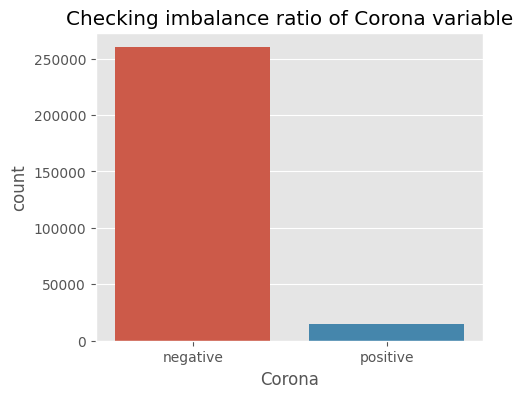

In [38]:
# checking the imbalance using countplot

plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=covid_tested, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()

In [39]:
# checking exact Corona Positive to Corona negative ratio

covid_tested[covid_tested.Corona=='negative'].shape[0]/covid_tested[covid_tested.Corona=='positive'].shape[0]

17.694841431876956

This shows that 1 in every 17-18 patients is corona positive.

In [40]:
# inspecting the Corona column

print(covid_tested['Corona'].value_counts())
print()
print(covid_tested['Corona'].value_counts(normalize=True))

negative    260008
positive     14694
Name: Corona, dtype: int64

negative    0.946509
positive    0.053491
Name: Corona, dtype: float64


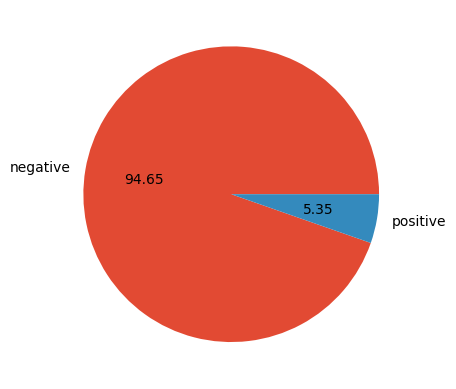

In [41]:
# plotting the above data in pie chart.

plt.pie(covid_tested['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

Our data is highly Imbalanced as 94.65% are covid negative and only 5.35% are covid positive.

In [42]:
#Encoding Corona column

covid_tested['Corona'] = covid_tested['Corona'].map({'negative' : 0 , 'positive' : 1})

In [43]:
# creating new dataframe with Corona value

df_positive = covid_tested[covid_tested['Corona'] == 1]
df_negative = covid_tested[covid_tested['Corona'] == 0]

In [44]:
covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274702 non-null  object
 1   Cough_symptoms       274702 non-null  object
 2   Fever                274702 non-null  object
 3   Sore_throat          274702 non-null  bool  
 4   Shortness_of_breath  274702 non-null  bool  
 5   Headache             274702 non-null  bool  
 6   Corona               274702 non-null  int64 
 7   Age_60_above         274702 non-null  object
 8   Sex                  274702 non-null  object
 9   Known_contact        274702 non-null  object
dtypes: bool(3), int64(1), object(6)
memory usage: 17.6+ MB


In [45]:
# getting all the independent variables into one and storing it in a list.

obj_plot = list(covid_tested.columns[(covid_tested.dtypes=="object") | (covid_tested.dtypes=="bool")])
obj_plot

['Test_date',
 'Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'Known_contact']

####**Relationship Between Independent Features and Dependent Features**

In [46]:
# checking each columns underlying groups

for i in obj_plot:
    # for patients with Corona positive
    print("--------------------------------------------------")
    print(f"{i} for patients with Corona positive")
    print(df_positive[i].value_counts().sort_values(ascending = False))
    # for patients with Corona negative
    print(f"\n{i} for patients with Corona negative")
    print(df_negative[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
Test_date for patients with Corona positive
31-03-2020    729
01-04-2020    681
02-04-2020    615
30-03-2020    611
26-03-2020    541
27-03-2020    516
05-04-2020    505
03-04-2020    504
25-03-2020    486
07-04-2020    483
04-04-2020    440
28-03-2020    439
13-04-2020    431
29-03-2020    428
06-04-2020    394
23-03-2020    388
24-03-2020    377
10-04-2020    356
14-04-2020    354
12-04-2020    290
11-04-2020    290
09-04-2020    288
19-04-2020    279
08-04-2020    274
22-03-2020    271
15-04-2020    259
23-04-2020    256
18-04-2020    237
21-04-2020    233
16-04-2020    233
20-04-2020    225
17-04-2020    207
22-04-2020    204
21-03-2020    192
20-03-2020    170
24-04-2020    169
19-03-2020    157
30-04-2020    153
18-03-2020    135
27-04-2020    129
28-04-2020    115
17-03-2020     92
26-04-2020     92
25-04-2020     91
16-03-2020     90
29-04-2020     75
15-03-2020     55
12-03-2020     39
13-03-2020     39
11-03-2020     39
14-03

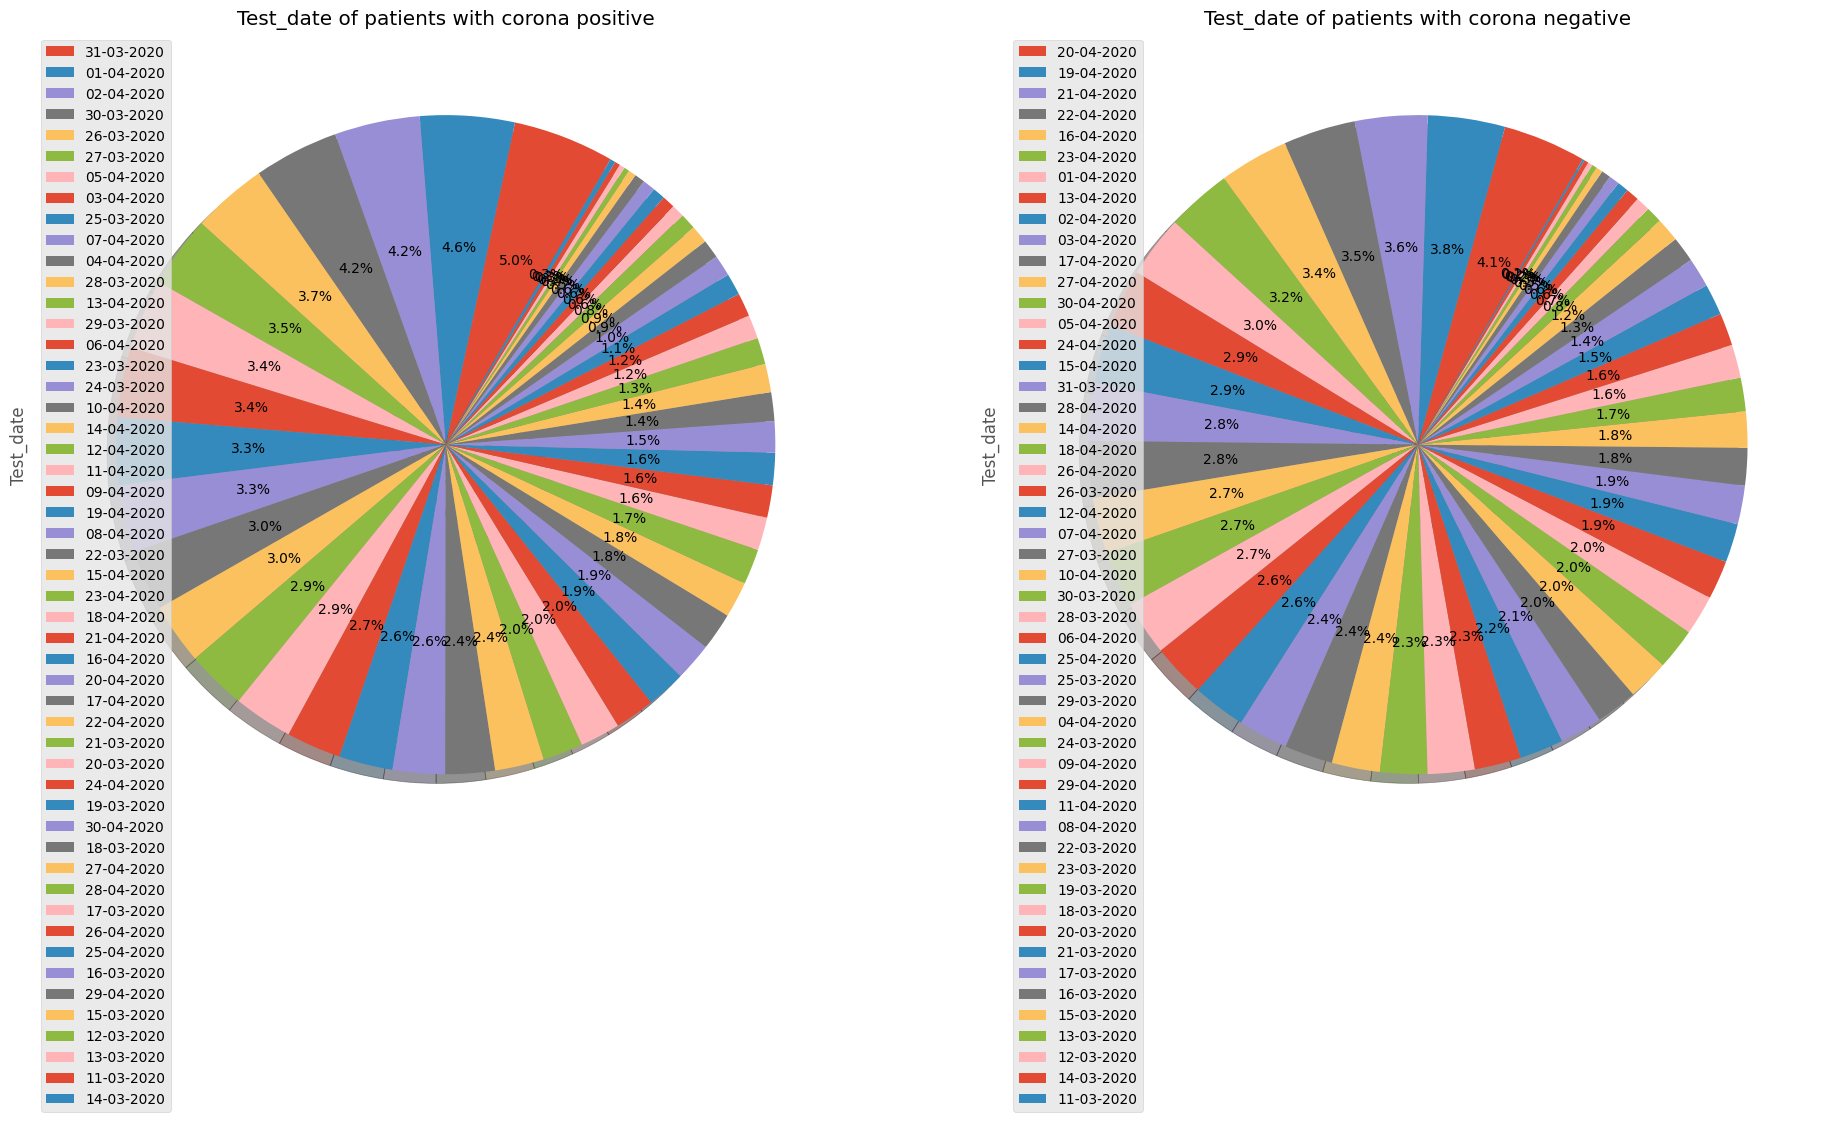

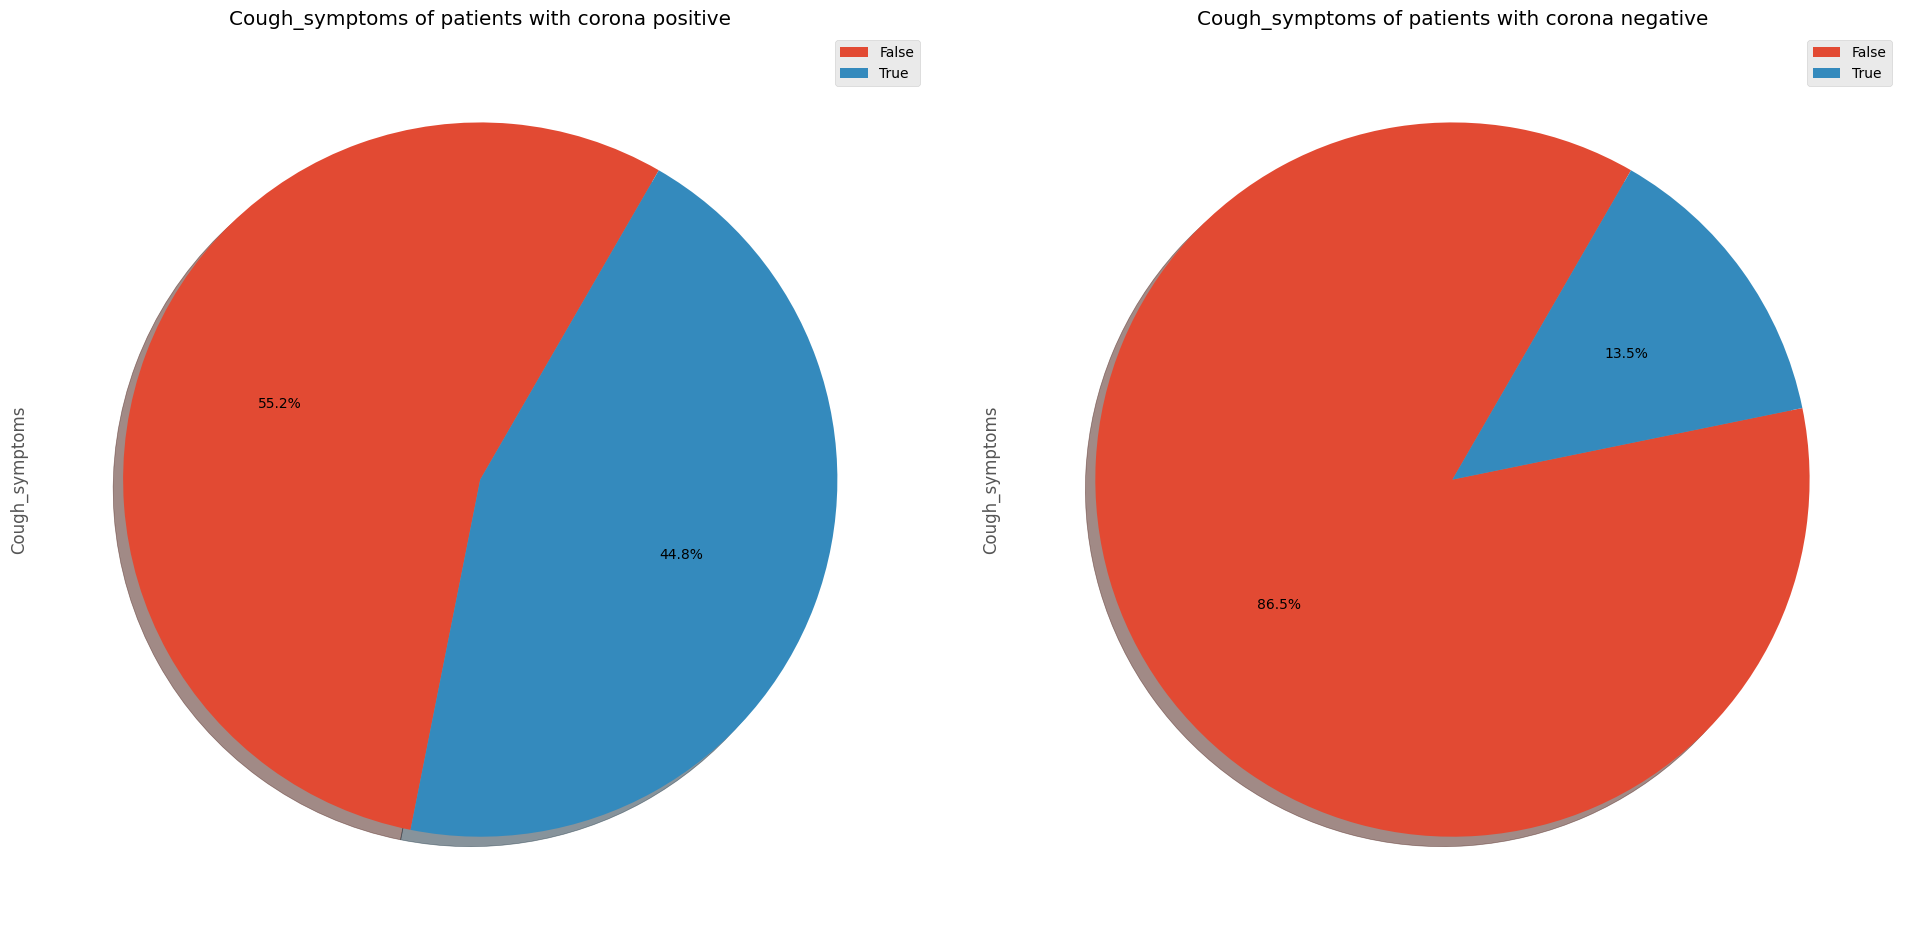

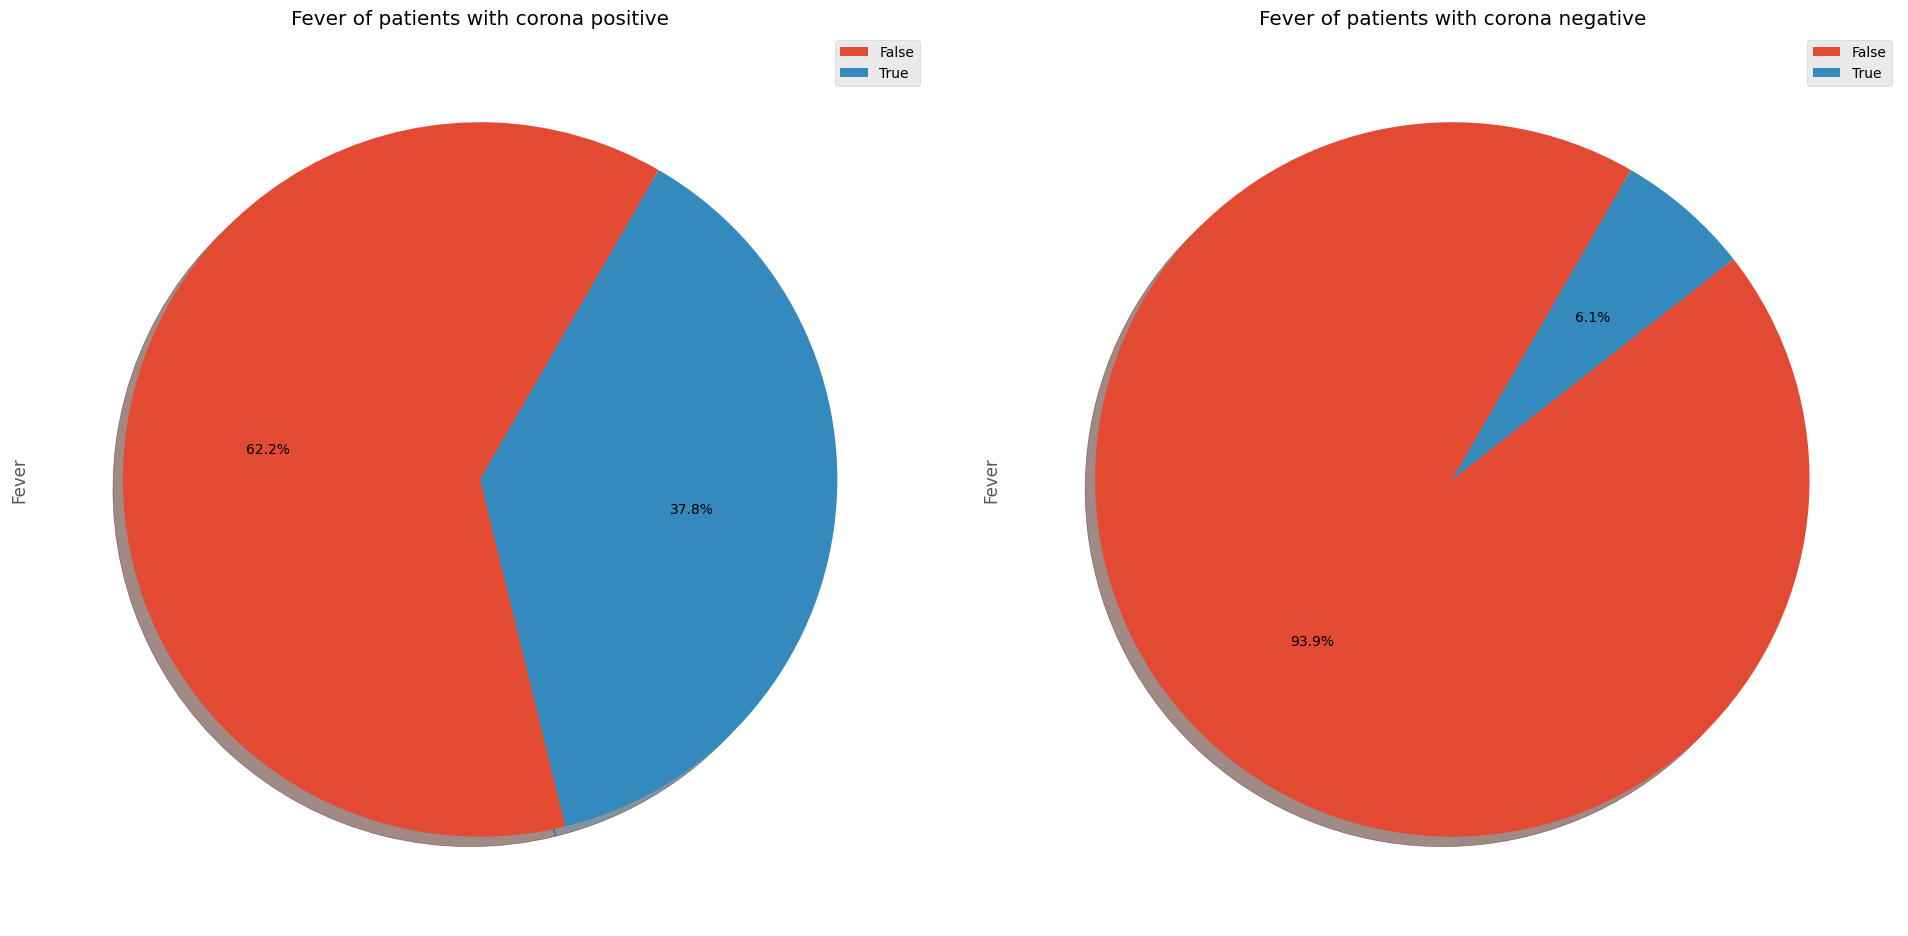

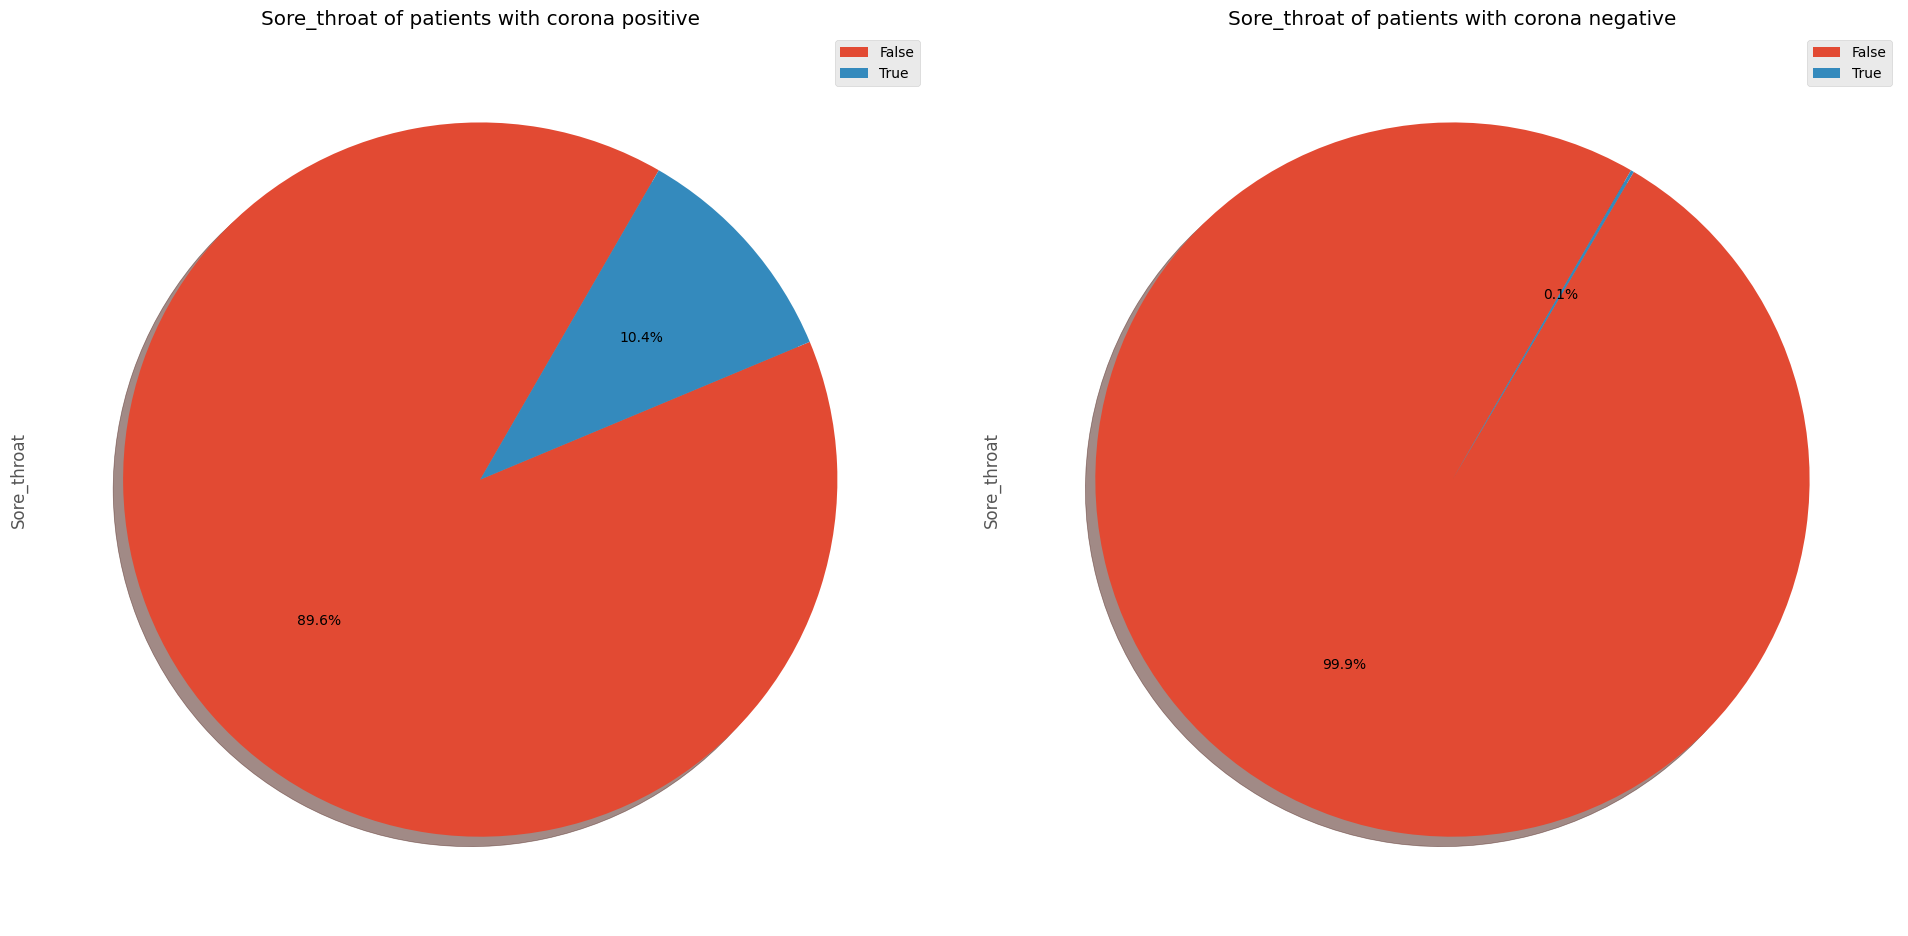

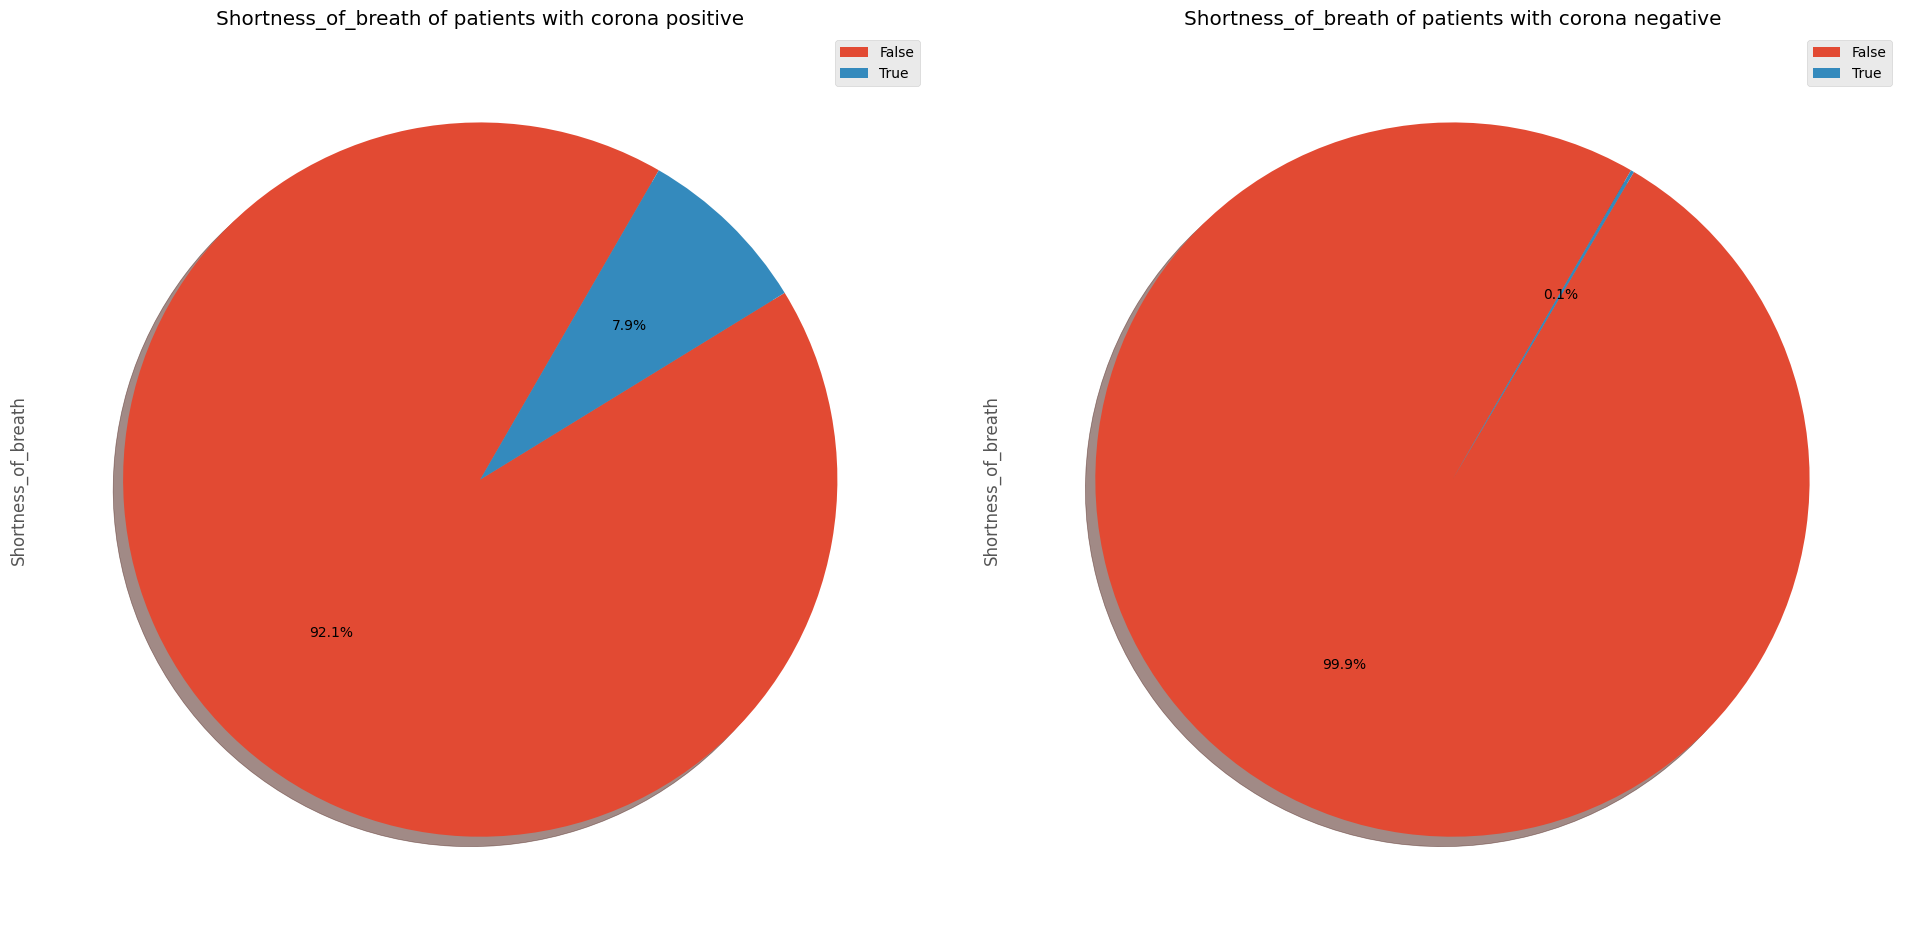

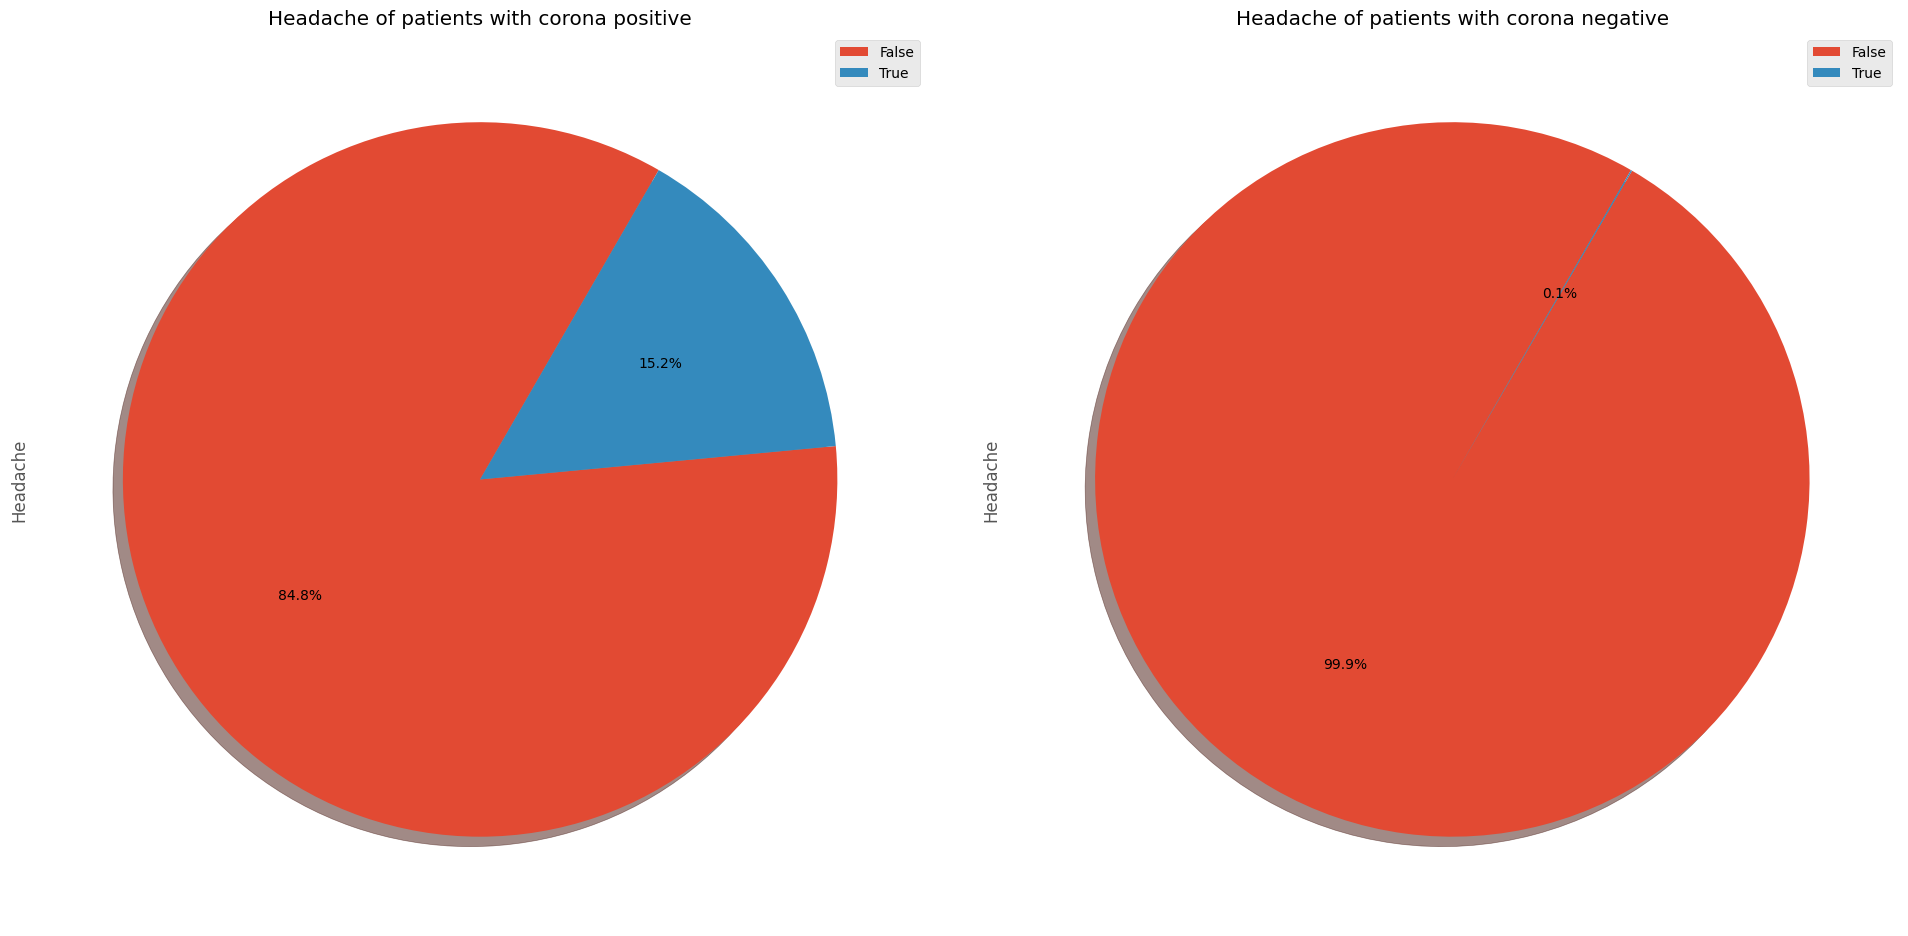

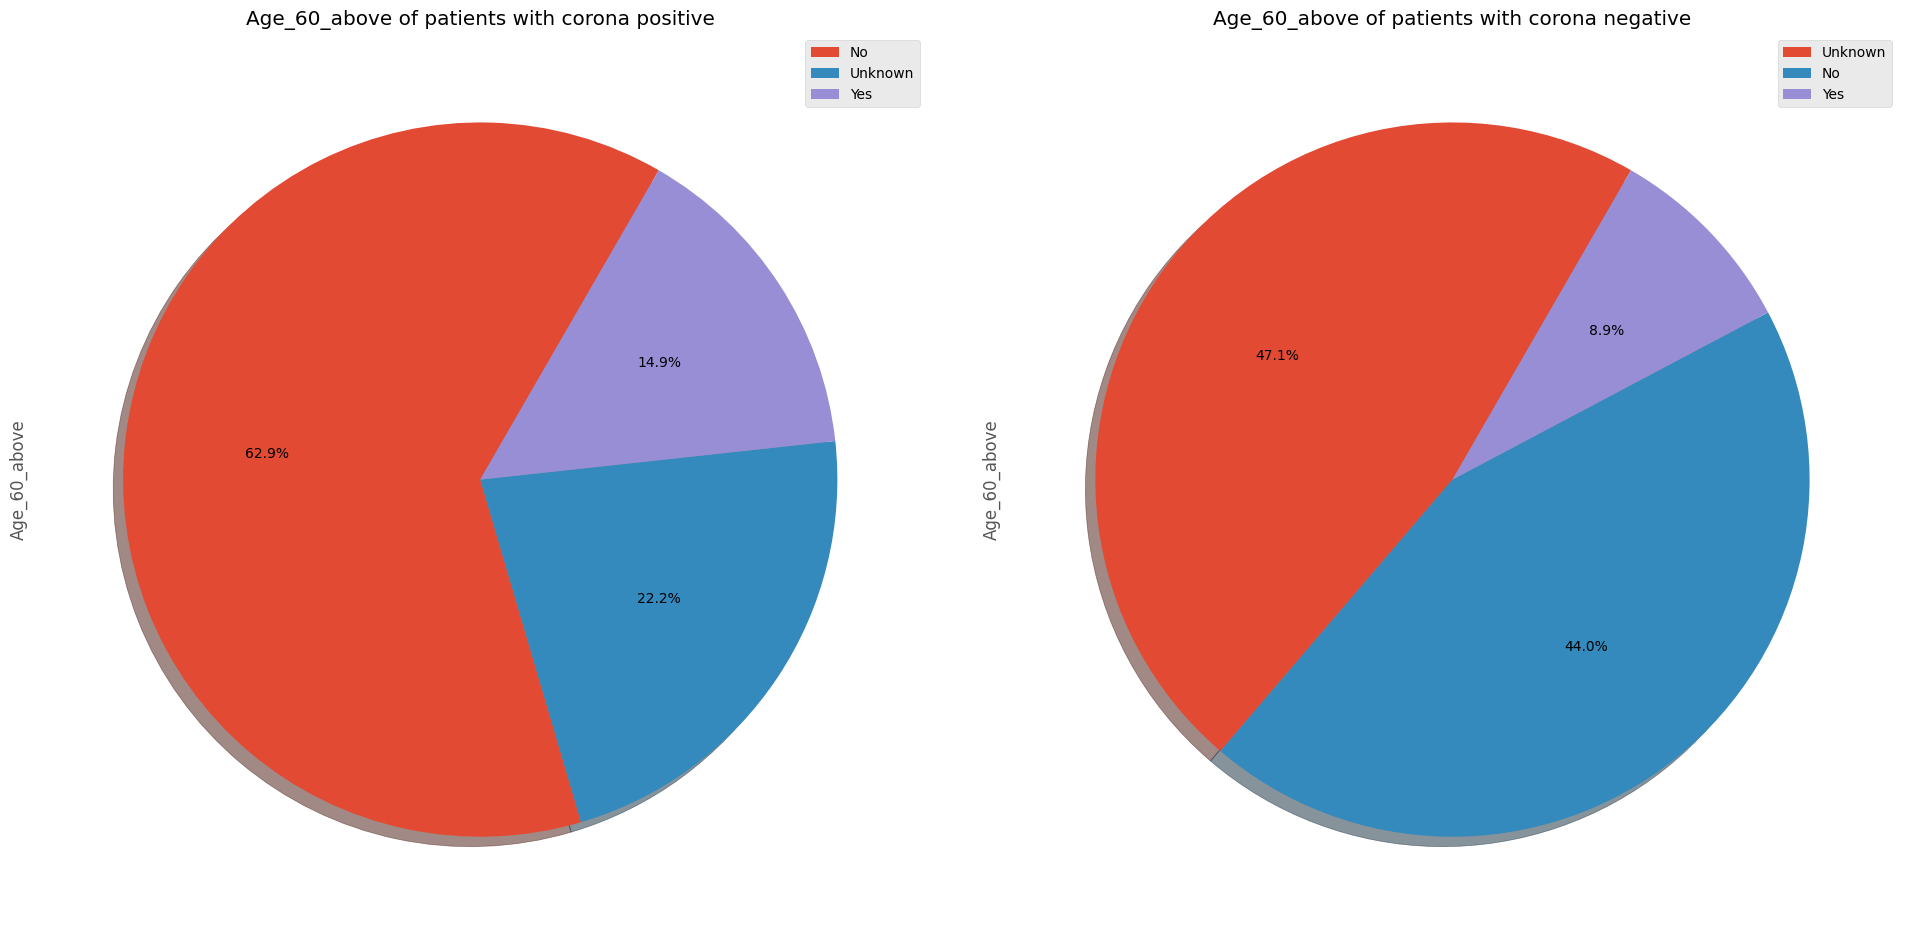

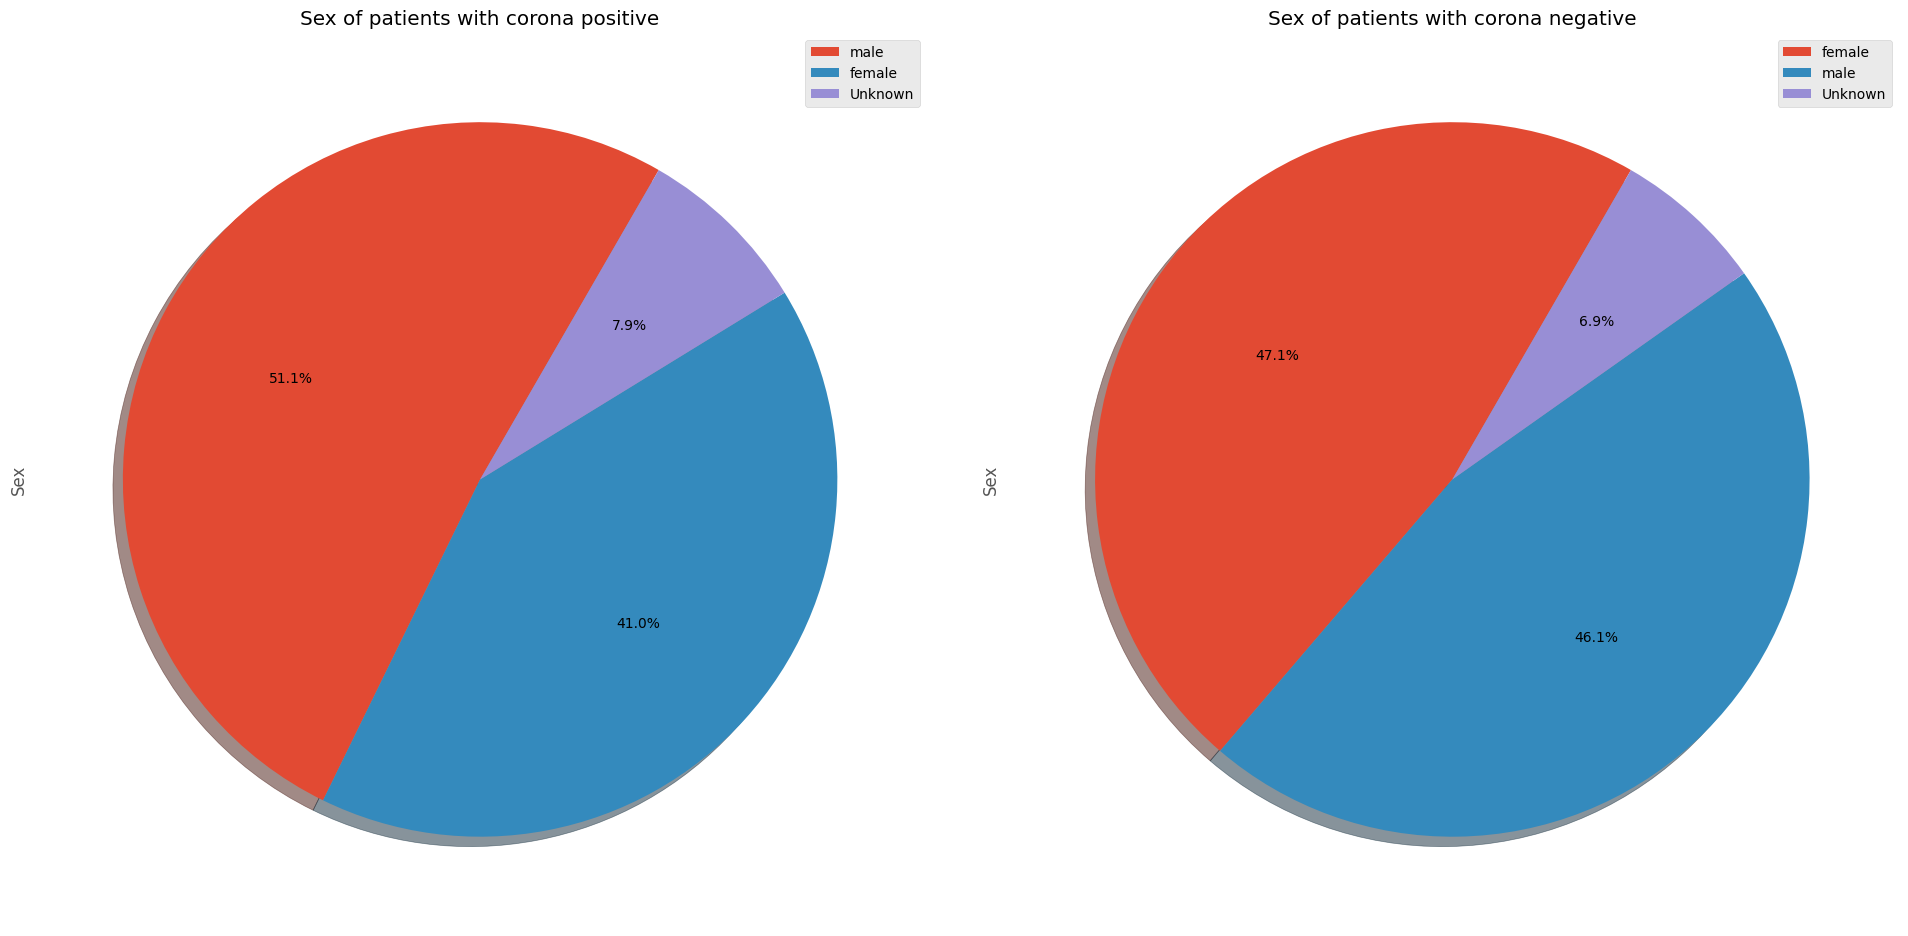

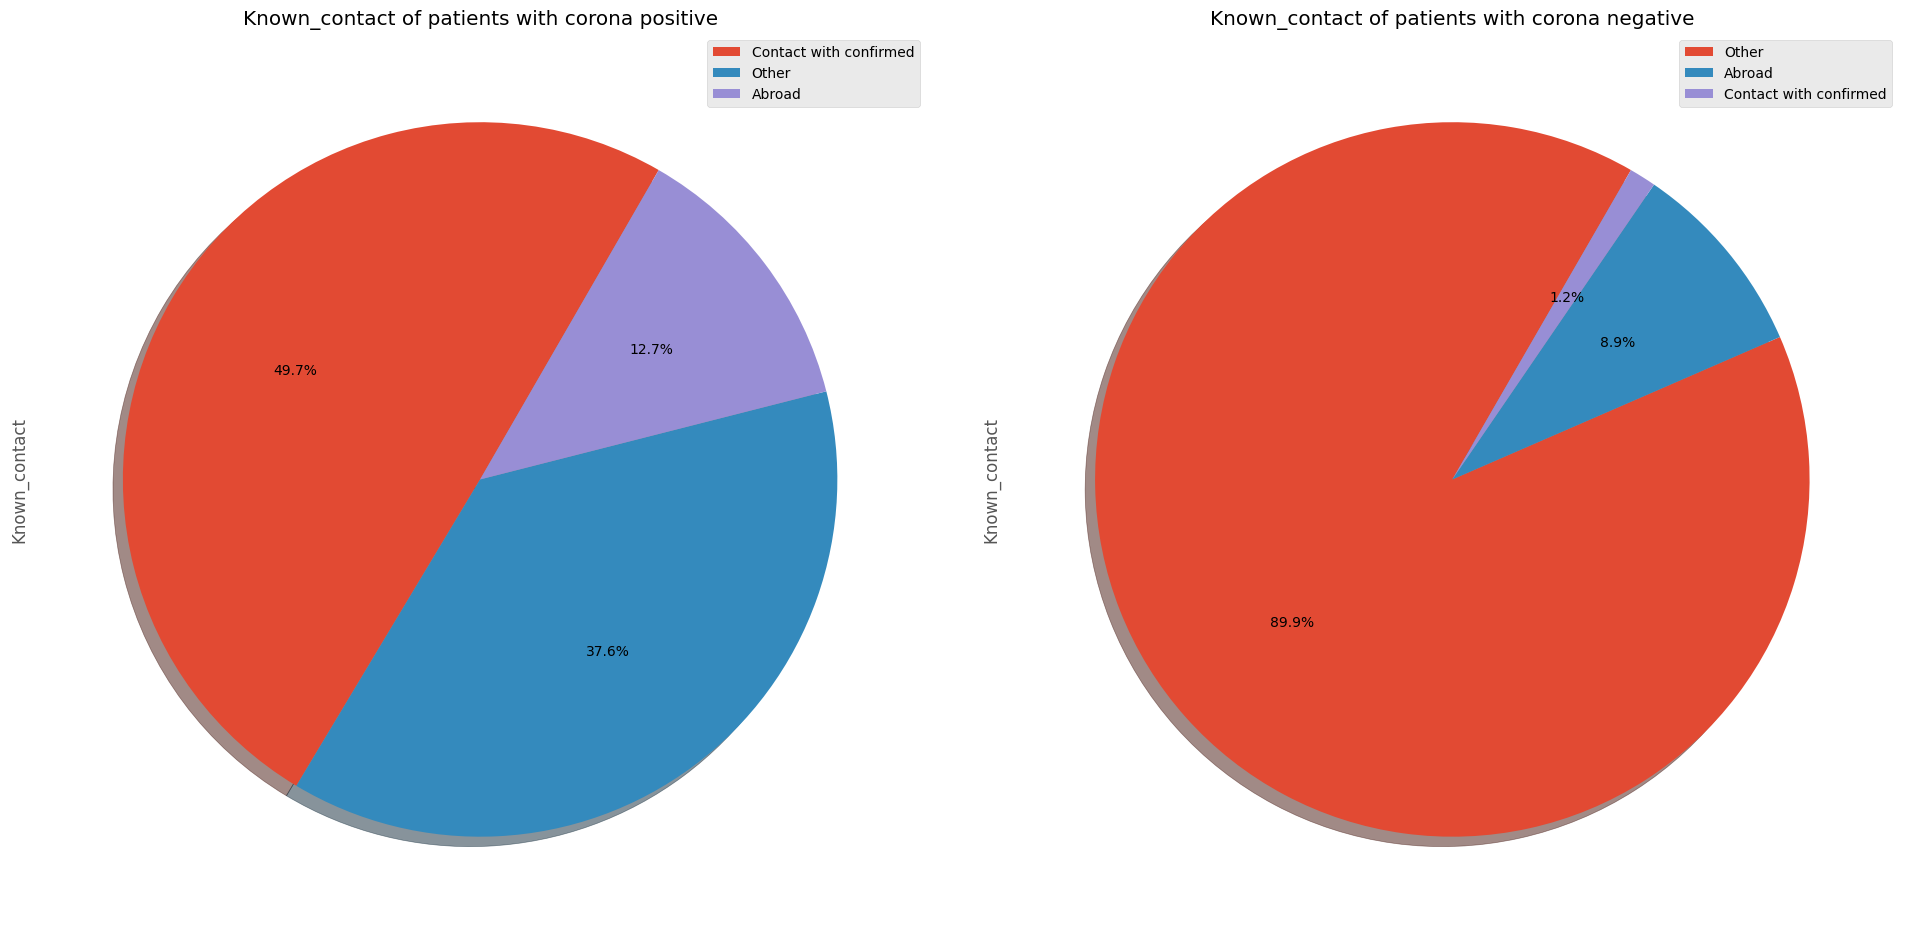

In [47]:
# plotting pie chart with independent variables(symptoms) and corona positive or negative


for i in obj_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])

    # for patients with corona positive
    plt.subplot(1,2,1)
    plt.title(f'{i} of patients with corona positive')
    df_positive[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()

    # for patients with corona negative
    plt.subplot(1,2,2)
    plt.title(f'{i} of patients with corona negative')
    df_negative[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

**Insights:**

*   Mostly Patients with corona positive have cough_symptoms and fever.
*   Headache, sore throat and shortness of breath are not present in Corona negative patients.

*   Almost 50% of Corona Positive Patients have been in contact with other positive patients.
*   There were considerably more amount of Corona positive patients in April than in March.





In [48]:
# Checking Coorelation among the attributes

covid_tested.corr()

,Sore_throat,Shortness_of_breath,Headache,Corona
Sore_throat,1.000000,0.195181,0.323343,0.278462
Shortness_of_breath,0.195181,1.000000,0.202082,0.233417
Headache,0.323343,0.202082,1.000000,0.367324
Corona,0.278462,0.233417,0.367324,1.000000


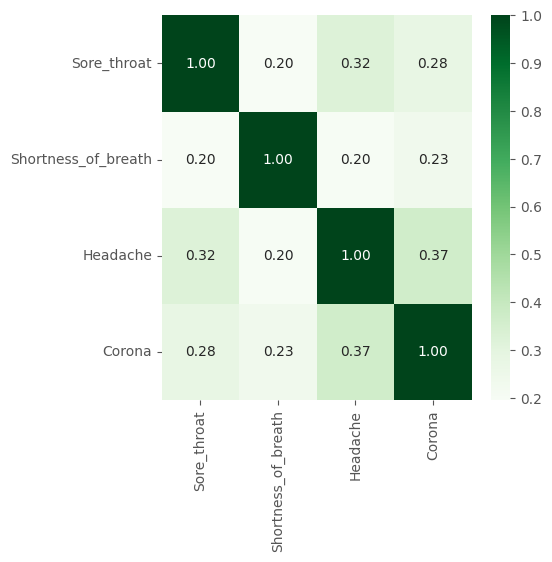

In [49]:
corr_df= covid_tested.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

**Insights:**

*   Almost all the attributes are moderately corelated with each other but none is highly corelated.



##**4.1 Feature Engineering**

It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

It includes feature creation, Feature scaling,feature extraction and feature selection.

In [50]:
# Here we will convert categorical data into numerical data

covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274702 non-null  object
 1   Cough_symptoms       274702 non-null  object
 2   Fever                274702 non-null  object
 3   Sore_throat          274702 non-null  bool  
 4   Shortness_of_breath  274702 non-null  bool  
 5   Headache             274702 non-null  bool  
 6   Corona               274702 non-null  int64 
 7   Age_60_above         274702 non-null  object
 8   Sex                  274702 non-null  object
 9   Known_contact        274702 non-null  object
dtypes: bool(3), int64(1), object(6)
memory usage: 17.6+ MB


In [51]:
# let's first download the dataset

covid_tested.to_csv("cleaned_data.csv")



*   All the columns are in object or boolean form and it needs to be converted into numerical data type as model understands only numerical values.
*   Let's convert the values into numercal values through label_encoding.


In [52]:
#fetching unique values of features

print(covid_tested['Cough_symptoms'].unique())
print(covid_tested['Fever'].unique())
print(covid_tested['Sore_throat'].unique())
print(covid_tested['Shortness_of_breath'].unique())
print(covid_tested['Headache'].unique())
print(covid_tested['Age_60_above'].unique())
print(covid_tested['Sex'].unique())
print(covid_tested['Known_contact'].unique())

[True False]
[False True]
[ True False]
[False  True]
[False  True]
['Unknown' 'No' 'Yes']
['Unknown' 'male' 'female']
['Abroad' 'Contact with confirmed' 'Other']


In [53]:
# First, we need to import labelencoder from sklearn

from sklearn.preprocessing import LabelEncoder

# Perfoming LabelEncoding
covid_tested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']] =covid_tested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)




In [54]:
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,1,0,1,0,0,0,1,0,0
1,11-03-2020,0,1,0,0,0,1,1,0,0
2,11-03-2020,0,1,0,0,0,1,1,0,0
3,11-03-2020,1,0,0,0,0,0,1,0,0
4,11-03-2020,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,0,0,0,0,0,1,1,2,2
278844,30-04-2020,0,0,0,0,0,0,1,1,2
278845,30-04-2020,0,0,0,0,0,0,1,2,2
278846,30-04-2020,0,0,0,0,0,0,1,2,2


In [55]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [56]:
covid_tested.to_csv("cleaned.csv")

In [57]:
X = covid_tested.drop(columns = ['Test_date','Corona'],axis = 1)
y = covid_tested['Corona']

####**4.1.1 Examining Multicollinearity using VIF**

Multicollinearity can be defined as the presence of high correlations between two or more independent variables (predictors). This is essentially a phenomenon in which independent variables are correlated with one another. It measures the degree to which two variables are related based on their correlation.

In [58]:
# First Import variance_inflation_factor (VIF) from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

data = covid_tested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]

# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

               feature       VIF
0       Cough_symptoms  1.553829
1                Fever  1.400507
2          Sore_throat  1.154474
3  Shortness_of_breath  1.080408
4             Headache  1.172620
5         Age_60_above  1.955016
6                  Sex  4.800908
7        Known_contact  4.805530


**Insights**

*   The default VIF cutoff value is 5, only variables with a VIF less than 5 will be included in the model.
*   VIF <= 5 is considered as considerable collinearity

*   All the VIF value is less than 5. We can go with all the features






# **4.2 Train/Test Split Based on Date**

As per our business requirement, I am taking 11 March 2020 to 15 April 2020 as Training and validation set and 16 April 2020 to 30 April 2020 as Test Set.

In [59]:
#changing the datatype of Test_date from object to Datetime

covid_tested['Test_date'] = pd.to_datetime(covid_tested["Test_date"] , format = '%d-%m-%Y')

In [60]:
covid_tested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,1,0,0
1,2020-03-11,0,1,0,0,0,1,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,0
3,2020-03-11,1,0,0,0,0,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1


In [61]:
# Breaking the data according to the date

break_date = pd.Timestamp("2020-04-15")
df_train = covid_tested[covid_tested["Test_date"] <= break_date]
df_test = covid_tested[covid_tested["Test_date"] > break_date]

In [62]:
# Data from 11th march 2020 to 15th april 2020

df_train

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,1,0,0
1,2020-03-11,0,1,0,0,0,1,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,0
3,2020-03-11,1,0,0,0,0,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,1,2,2
163185,2020-04-15,0,0,0,0,0,0,1,2,2
163186,2020-04-15,0,0,0,0,0,0,1,1,2
163187,2020-04-15,0,0,0,0,0,0,1,2,2


In [63]:
# Data from 16th april 2020 to 30th april 2020

df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,1,0,0,0,0,0,1,1,0
163190,2020-04-16,0,0,0,0,0,0,1,1,2
163191,2020-04-16,1,0,0,0,0,0,1,1,0
163192,2020-04-16,0,0,0,0,0,0,1,2,2
163193,2020-04-16,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,1,2,2
278844,2020-04-30,0,0,0,0,0,0,1,1,2
278845,2020-04-30,0,0,0,0,0,0,1,2,2
278846,2020-04-30,0,0,0,0,0,0,1,2,2


####**4.2.1 Separating dataset into Training set, Test Set and Validation set**

In [64]:
# dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train

X_train = df_train.drop(columns = ['Test_date','Corona'],axis = 1)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,1,2,2
163185,0,0,0,0,0,1,2,2
163186,0,0,0,0,0,1,1,2
163187,0,0,0,0,0,1,2,2


In [65]:
# storing outcome variable in y_train.

y_train = df_train['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160463, dtype: int64

In [66]:
# dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.

X_test = df_test.drop(columns = ['Test_date','Corona'],axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,1,1,0
163190,0,0,0,0,0,1,1,2
163191,1,0,0,0,0,1,1,0
163192,0,0,0,0,0,1,2,2
163193,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2,2
278844,0,0,0,0,0,1,1,2
278845,0,0,0,0,0,1,2,2
278846,0,0,0,0,0,1,2,2


In [67]:
# storing Outcome variable test Set data into y_test.

y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64


In [68]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [69]:
# Training Set

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Validation Set

print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (128370, 8)
y_train shape: (128370,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y val shape: (32093,)


# **4.3 Feature Scaling**

In [70]:
# performing transformation of data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       ...,
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789]])

In [71]:
X_test=sc.transform(X_test)
X_test

array([[ 2.14460242, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 , -2.70955325],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 , -2.70955325],
       ...,
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 ,  0.41672789]])

# **Building Algorithm**

## **5.1 Logistic Regression**

Logistic regression is a statistical method used to analyze a data set in which there are one or more independent variables that determine an outcome. It is commonly used for binary classification problems, where the goal is to predict one of two possible outcomes.

In [72]:
from sklearn.linear_model import LogisticRegression
### Creating a Logistic regression object
lr = LogisticRegression(random_state = 0)
### Passing independant and dependant training data to the model
lr.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [73]:
lr_pred=lr.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [74]:
# Train score and Test score of Logistic Regression

from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr_pred))

Train accuracy of Logistic Regression is 0.9435927397366987
Accuracy (Test) score of Logistic Regression is 0.9761902677719518
Accuracy (Test) score of Logistic Regression is 0.9761902677719518
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.25      0.00      0.01      2698

    accuracy                           0.98    114239
   macro avg       0.61      0.50      0.50    114239
weighted avg       0.96      0.98      0.96    114239



### **Insights**:

We can see here that the accuracy from Logistic Regression model is 97.6%.

Now let us check with other models too



### **5.2 KNeighbors Classifier**



*   KNN is a Supervised Learning, a non-parametric algorithm, and a lazy learner algorithm that categorizes the new data into the available categories based on similarity.
*   It is non-parametric, which means it does not make any assumption on underlying data.

*   It is a lazy learner algorithm since it saves the dataset instead of learning immediately from the training set and then uses it to execute an action when classifying data.





In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [76]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

In [77]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of KNN is 0.9572407883461868
Accuracy (Test) score of KNN is 0.981267343026462
Accuracy (Test) score of KNN is 0.981267343026462
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.76      0.30      0.43      2698

    accuracy                           0.98    114239
   macro avg       0.87      0.65      0.71    114239
weighted avg       0.98      0.98      0.98    114239



### **Insights :**

The Accuracy from KNN model is 98.12% which is better than logistic regression model.

## **5.3 Decision Tree Algorithm**



*   One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm. It also known as classification and regression tree (CART).
*   According to predetermined principles, data is constantly divided in this algorithm at each row till the final result is obtained. Decision trees classify the results into groups until no more similarity is left. Decision tree is non-parametric approach and does not depend on any probability distribution assumptions.



In [78]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)


In [79]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

In [80]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

Train accuracy of Decision Tree is 0.9511100724468333
Accuracy (Test) score of Decision Tree is 0.9854165390103204
Accuracy (Test) score of Decision Tree is 0.9854165390103204
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.76      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.82    114239
weighted avg       0.98      0.99      0.98    114239



### **Insights :**

In Decision Tree Algorithm, we can see that Accuracy is 98.54% which is again a little higher than KNN model

## **5.4 Random Forest**



*   Random Forest mixes the output of various decision trees to produce a single conclusion. Its widespread use is motivated by its adaptability and usability because it can solve classification and regression issues.
*   The concept of Breiman's "bagging" is combined with a random selection of elements to create random forest. By using the average or mode of the results from several decision trees, the forecast is meant to be more precise. The more decision trees that are taken into account, the more precise the results will be. Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.



In [81]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [82]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

In [83]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_pred))

Train accuracy of Random Forest is 0.9594064033652723
Accuracy (Test) score of Random Forest is 0.9838846628559423
Accuracy (Test) score of Random Forest is 0.9838846628559423
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.77      0.45      0.57      2698

    accuracy                           0.98    114239
   macro avg       0.88      0.73      0.78    114239
weighted avg       0.98      0.98      0.98    114239



### **Insights :**

Random Forest gives us the accuracy of 98.5 which is equal to Decison Tree Algorithm.

### **Conclusion :**

After testing and evaluating the data from different algorithm. I have came to the conclusion that **Logistic Regression** gives us the least accuracy i.e. 97% and the rest **KNN algorithm**, **Decision Tree algorithm** and **Random Forest algorithm** gives us an accuracy of 98%. So we can use any of these 3 models.

## **6.0 Predictive Model**

In [84]:
input_data = (1,1,1,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[ 2.14460242  3.14173877  9.20605795 -0.09819679  8.24494048  0.82519236
   0.99185482  0.41672789]]
[1]
The person is corona positive


In [85]:
input_data = (0,0,0,0,0,0,1,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[-0.46628689 -0.31829508 -0.10862413 -0.09819679 -0.1212865  -0.51991561
  -0.5147289  -2.70955325]]
[0]
The person is corona negative
